In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price/house_prices.csv


In [3]:
import pandas as pd

# Correct path (single / between directory and file)
train = pd.read_csv("/kaggle/input/house-price/house_prices.csv")

print(train.head())

   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    than

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [19]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# reading data into pandas dataframe
df = pd.read_csv(URL, header=None)

# selecting a single feature (column index 5) and target (column index 13)
# only using 100 instances for simplicity
X = df.loc[:100, 5].values  # Convert to NumPy array
y = df.loc[:100, 13].values # Convert to NumPy array
print(df.head(5))

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


Mean Squared Error: 9.762853674412973



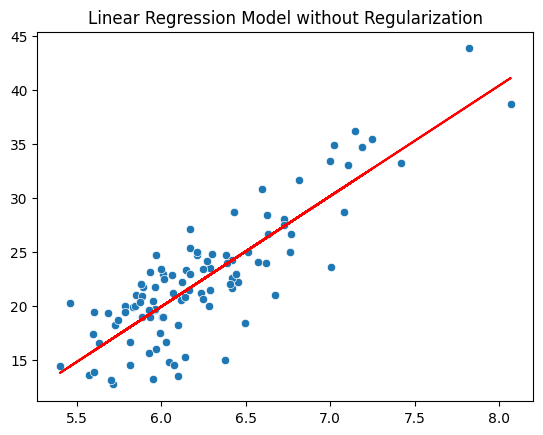

In [20]:
# reshaping the data 
X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

# instantiating the linear regression model
linear_regression = LinearRegression()

# training the model 
linear_regression.fit(X_reshaped, y_reshaped)

# making predictions on the training data
y_pred = linear_regression.predict(X_reshaped)

# evaluating the model performance
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}\n")

# plotting the line of best fit given by linear regression
sns.scatterplot(x=X, y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model without Regularization")
plt.show()


Alpha values ranges from 0.1 to 100 where(0.1 is weak regularization while 100 is strong regularization)

Mean Squared Error: 13.95519903175692
Model Coefficients: [6.03425638]n


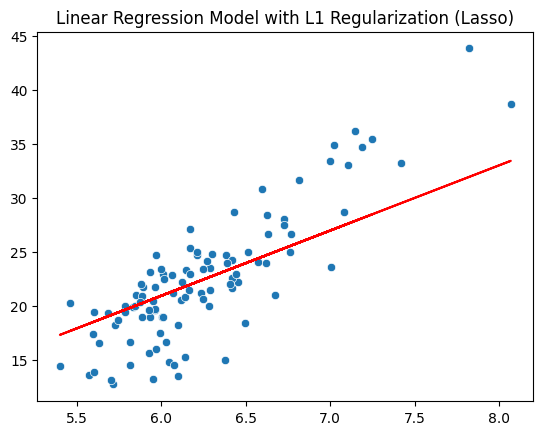

In [24]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
# instantiating the lasso regression model
lasso = Lasso(alpha=1)   

# training the model
lasso.fit(X_reshaped, y_reshaped)

# making predictions 
y_pred = lasso.predict(X_reshaped)

# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}n")

# plotting the line of best fit
sns.scatterplot(x=X, y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show()


Mean Squared Error: 9.763279938830513
Model Coefficients: [[10.18432825]]n


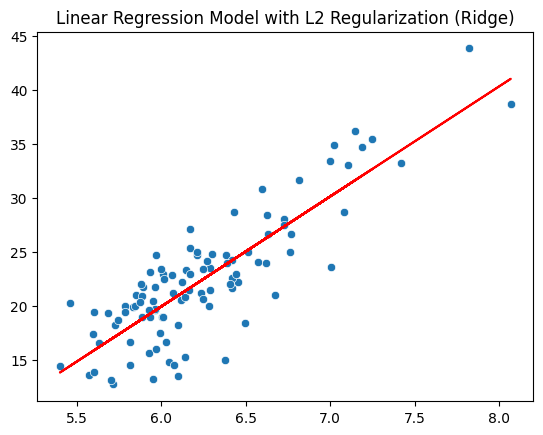

In [22]:
# instantiation, training and inference
ridge = Ridge(alpha=0.1)
ridge.fit(X_reshaped, y_reshaped)
y_pred = ridge.predict(X_reshaped)

mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}n")

sns.scatterplot(x=X, y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L2 Regularization (Ridge)")
plt.show()


Ridge coefficients: [2.11927192 1.28708537 1.98104639]
Lasso coefficients: [3.31809057 0.         1.93720402]
Ridge MSE: 0.16055186784560813
Lasso MSE: 0.18248476175693149


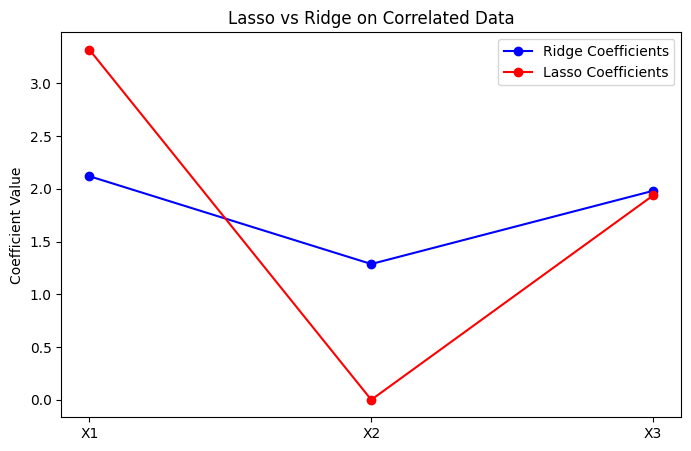

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Seed for reproducibility
np.random.seed(42)

# Generate correlated data
n_samples = 100
X1 = np.random.randn(n_samples)
X2 = X1 + np.random.normal(0, 0.1, n_samples)  # Highly correlated with X1
X3 = np.random.randn(n_samples)                # Independent feature

X = np.vstack([X1, X2, X3]).T
y = 3*X1 + 0.5*X2 + 2*X3 + np.random.randn(n_samples) * 0.5  # target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # smaller alpha for lasso to allow some shrinkage
lasso.fit(X_train, y_train)

# Predictions
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

# Evaluation
print("Ridge coefficients:", ridge.coef_)
print("Lasso coefficients:", lasso.coef_)
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))

# Plot coefficients
plt.figure(figsize=(8,5))
plt.plot(ridge.coef_, 'bo-', label="Ridge Coefficients")
plt.plot(lasso.coef_, 'ro-', label="Lasso Coefficients")
plt.xticks(range(X.shape[1]), ["X1","X2","X3"])
plt.ylabel("Coefficient Value")
plt.title("Lasso vs Ridge on Correlated Data")
plt.legend()
plt.show()
